# Data Analysis with Pandas

## Introduction
Pandas is a powerful data analysis and manipulation library for Python. In this notebook, we'll explore various functionalities of pandas, from basic data structures like Series and DataFrames to more complex data manipulation techniques.

## Installation
Pandas can be installed using `pip` as follows:
```python
!pip install pandas
```
Alternatively, if you are using Anaconda, you can install using `conda`:
```python
conda install pandas
```
To import pandas, use the following command:
```python
import pandas as pd
```

## Core Components of Pandas: Series and DataFrame
The primary two components of pandas are the `Series` and `DataFrame`.
A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of Series.

In [1]:
import pandas as pd
import numpy as np

In [16]:
# Creating a Series
series = pd.Series([1, 3, 5, np.nan, 6, 8])

# Creating a DataFrame by passing a numpy array
dates = pd.date_range('20230101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

# Creating a DataFrame by passing a dict of objects
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D' : np.array([3] * 4, dtype='int32'),
                     'E' : pd.Categorical(['test', 'train', 'test', 'train']),
                     'F' : 'gone' })
#df2.describe()

df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,gone
1,1.0,2013-01-02,1.0,3,train,gone
2,1.0,2013-01-02,1.0,3,test,gone
3,1.0,2013-01-02,1.0,3,train,gone


## Creating a DataFrame
There are multiple ways to create a DataFrame. Here, we'll create one using a dictionary of lists.

In [ ]:
data = {'A': [1, 2, 3, 4],
        'B': [5, 6, 7, 8],
        'C': [9, 10, 11, 12],
        'D': [13, 14, 15, 16]}
df2 = pd.DataFrame(data)
print(df2)

   A  B   C   D
0  1  5   9  13
1  2  6  10  14
2  3  7  11  15
3  4  8  12  16


**From a csv file**

In [ ]:
dfn = pd.read_csv(r"D:\Documents\UVIC\Stats & Data Analysis\Pres\username.csv")
dfn.head

<bound method NDFrame.head of   Username; Identifier;First name;Last name
0               booker12;9012;Rachel;Booker
1                    grey07;2070;Laura;Grey
2              johnson81;4081;Craig;Johnson
3               jenkins46;9346;Mary;Jenkins
4                  smith79;5079;Jamie;Smith>

## Series and DataFrame
Pandas has two main data structures: Series and DataFrame. Series represents a one-dimensional array, and DataFrame is a two-dimensional table of data with rows and columns.

Dataframes store data in the form of a grid (table) with rows and columns. Each column is used to store similar type of data (or variables/parameters) while each row is an instance of a value. Similar to a spreadsheet on Excel. 

In [4]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
dates = pd.date_range('20230101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

#from a numpy array
data = np.array(["0","2","3"]),
print(pd.DataFrame(data))
s

   0  1  2
0  0  2  3


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

## Keywords


Timestamp
Categorical 
read_csv
sort_values
dropna
drop
fillna
fill
groupby 
groupby.agg()
groupby.sum()
sum
astype
cat
set_categories
asfreq
resample


# Pandas DataFrame Keywords Explanation

In this part, we will cover several essential keywords and methods used in the pandas library, which are crucial for data manipulation and analysis.

## Timestamp
`Timestamp` represents a single point in time. It is the pandas equivalent to Python's `datetime` and is interchangeable with it in most cases.

```python
import pandas as pd
# Example of creating a Timestamp
timestamp = pd.Timestamp('2022-01-01 10:00')
print(timestamp)


In [ ]:
# Example of converting a series to categorical type
s = pd.Series(["a", "b", "c", "a"], dtype="category")
print(s)

# Example of reading a CSV file
df = pd.read_csv('file_path.csv')

#sort_values sorts a DataFrame by the values of one or more columns.
# Example of sorting by a column
df.sort_values(by='column_name', ascending=True)

#dropna removes missing values from a DataFrame.
# Example of removing all rows where any column has NA
df.dropna()

#drop is used to remove rows or columns by specifying label names and the corresponding axis.
# Example of dropping a column
df.drop('column_name', axis=1)

#fillna replaces missing values with a specified value.
# Example of replacing NA with a specific value
df.fillna(value=0)

#groupby allows grouping DataFrame rows based on the values of a specified column and applying a function to each group.
# Example of grouping by a column
grouped = df.groupby('column_name')

#groupby.agg() allows applying multiple aggregation operations to the grouped data.
# Example of using groupby with aggregation
df.groupby('column').agg({'data1': 'sum', 'data2': 'max'})

#sum adds the values in a DataFrame or Series, typically used after grouping.
# Example of summing values in a Series
df['column_name'].sum()

#groupby.sum() computes the sum of the grouped data.
# Example of summing grouped data
df.groupby('column_name').sum()

#astype is used to cast a pandas object to a specified dtype.
# Example of changing the data type of a column
df['column_name'].astype('int32')

#cat is an accessor used to handle categorical data.
# Example of accessing categorical methods
df['categorical_column'].cat.categories

#set_categories is used to define the categories explicitly.
# Example of setting categories
df['categorical_column'].cat.set_categories(['category1', 'category2'])

#asfreq converts a time series to a specified frequency.
# Example of changing frequency of a time series
ts.asfreq('M')

# Example of resampling a time series data
df.resample('M').mean()

pivot_table

## Basic DataFrame Operations
Let's see how to view data, select, sort, and add new data to our DataFrame.

In [15]:
print(df2.head())
print(df2.tail(3))
print(df2.describe())
df2.sort_values(by='B')
df2['E'] = df2['A'] + df2['B']

   A  B   C   D
0  1  5   9  13
1  2  6  10  14
2  3  7  11  15
3  4  8  12  16
   A  B   C   D
1  2  6  10  14
2  3  7  11  15
3  4  8  12  16
              A         B          C          D
count  4.000000  4.000000   4.000000   4.000000
mean   2.500000  6.500000  10.500000  14.500000
std    1.290994  1.290994   1.290994   1.290994
min    1.000000  5.000000   9.000000  13.000000
25%    1.750000  5.750000   9.750000  13.750000
50%    2.500000  6.500000  10.500000  14.500000
75%    3.250000  7.250000  11.250000  15.250000
max    4.000000  8.000000  12.000000  16.000000


In [ ]:
# Viewing the top rows of the DataFrame
df.head()

# Viewing the index, columns, and the underlying numpy data
df.index
df.columns
df.to_numpy()

# Describe shows a quick statistic summary of your data
df.describe()

# Sorting by an axis and by values
df.sort_index(axis=1, ascending=False)
df.sort_values(by='B')

,A,B,C,D
2023-01-02,-0.806874,-0.689775,-0.280344,-0.236044
2023-01-01,-0.003607,-0.584760,2.025843,-0.550929
2023-01-05,0.576850,0.151869,0.913662,-0.485021
2023-01-06,-0.283520,0.271833,1.036482,-0.311588
2023-01-04,0.772526,0.494485,-0.529486,0.276304
2023-01-03,0.590829,2.549776,-0.493782,-0.848701


## Data Cleaning
Data cleaning is a crucial step in data analysis. We'll demonstrate how to handle missing data and drop duplicates.

In [24]:
df2.iloc[2, 2] = np.nan  # Introduce a NaN value
print(df2)
df2.dropna(how='any')  # Drop any row with NaN
df2.fillna(value=5)    # Fill NaN with a value
pd.isna(df2)

   A  B     C   D   E
0  1  5   9.0  13   6
1  2  6  10.0  14   8
2  3  7   NaN  15  10
3  4  8  12.0  16  12


,A,B,C,D,E
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,False,False,False,False


## Grouping
Grouping involves one or more of the following steps: Splitting the data, applying a function, and combining the results.

In [25]:
df2.groupby('A').sum()

,B,C,D,E
A,,,,
1,5,9.0,13,6
2,6,10.0,14,8
3,7,0.0,15,10
4,8,12.0,16,12


### Group By: Split-Apply-Combine
Advanced grouping operations to summarize data.

In [ ]:
df3.groupby('F').agg({'A': ['mean', 'min', 'max'], 'B': 'sum', 'C': 'count'})

A                             B     C
           mean       min       max       sum count
F                                                  
False -0.819656 -1.830707 -0.277708  5.475151     8
True   0.954371  0.022371  2.637768 -4.011988     8

## Advanced DataFrame Manipulation
We will now look at more advanced data manipulations like indexing, selection, and extending the DataFrame with new data.

In [27]:
df3 = pd.DataFrame(np.random.randn(16, 5), columns=list('ABCDE'))
df3['F'] = df3['A'] > 0
# Selecting data with a boolean criterion
df_positive_A = df3[df3['A'] > 0]

### Working with Text Data
Pandas provides a suite of string operations that you can use to manipulate text data.

### MultiIndex and Advanced Indexing
Pandas allows for more complex indexing with MultiIndex.

In [31]:
arrays = [np.array(['bar', 'bar', 'baz', 'baz']),
         np.array(['one', 'two', 'one', 'two'])]
df_multi = pd.DataFrame(np.random.randn(4, 4), index=arrays, columns=['A', 'B', 'C', 'D'])
df_multi.index.names = ['first', 'second']
df_multi.loc['bar']

,A,B,C,D
second,,,,
one,0.270476,1.152464,1.632514,-1.485567
two,-1.403543,3.072781,0.258686,-1.176571


### Pivot Tables
Creating pivot tables for data summarization.

In [32]:
df_pivot = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
pd.pivot_table(df_pivot, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.712104 -1.066937
      B  0.749318 -1.718793
      C  0.195875  0.253258
three A  0.699040       NaN
      B       NaN  0.379192
      C  0.518788       NaN
two   A       NaN -0.316545
      B  0.205198       NaN
      C       NaN  1.440215

## Time Series
Pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data).

In [33]:
rng = pd.date_range('1/1/2022', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

C:\Users\abdou\AppData\Local\Temp\ipykernel_19588\1027061288.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng = pd.date_range('1/1/2022', periods=100, freq='S')


2022-01-01    24613
Freq: 5min, dtype: int32

## Time Series
Pandas has simple, powerful, and efficient functions for performing operations like resampling during frequency conversion (e.g., converting secondly data into 5-minute data).

C:\Users\abdou\AppData\Local\Temp\ipykernel_28820\4221664191.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.asfreq(freq='M', method='bfill')


<Axes: >

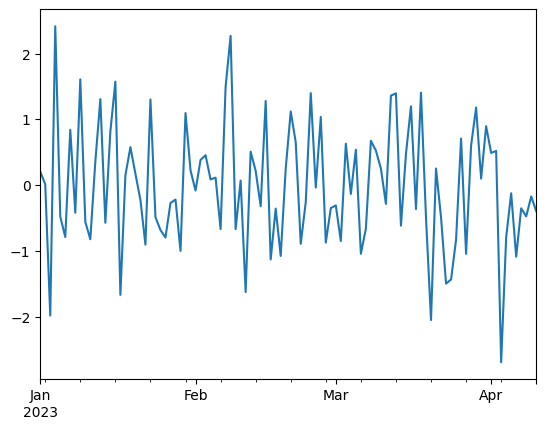

In [4]:
# Creating a time series with a DateTime index
rng = pd.date_range('20230101', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

# Changing the frequency of the time series
ts.asfreq(freq='M', method='bfill')

# Plotting the time series
ts.plot()

## Categorical Data
Pandas can include categorical data in a DataFrame, which can lead to more efficient storage and better performance for certain operations.

In [21]:
# Create the initial DataFrame
df_cat = pd.DataFrame({'id': range(1, 6),
                       'raw_grade': ['a', 'b', 'c', 'a', 'e']})

# Convert 'raw_grade' to a categorical type with the specified categories
categories = ['very bad', 'bad', 'medium', 'good', 'very good']
df_cat['grade'] = pd.Categorical(df_cat['raw_grade'], categories=categories, ordered=True)

# Compute group sizes
group_sizes = df_cat.groupby('grade').size()

# Reindex the group sizes to include all categories, filling missing values with 0
group_sizes = group_sizes.reindex(categories, fill_value=0)

# Print the group sizes
print(group_sizes)


grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64


C:\Users\abdou\AppData\Local\Temp\ipykernel_28820\2765931533.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df_cat.groupby('grade').size()


In [23]:
# Create a larger DataFrame
df_cat = pd.DataFrame({
    'id': range(1, 101),  # Increase the range for a larger DataFrame
    'raw_grade': np.random.choice(['a', 'b', 'c', 'd', 'e', 'f'], size=100)  # Use numpy to randomly choose letters
})

# Map the randomly chosen letters to more descriptive categories
grade_mapping = {'a': 'very good', 'b': 'good', 'c': 'medium', 'd': 'bad', 'e': 'very bad', 'f': 'fail'}

# Convert 'raw_grade' to more descriptive categories and then to a categorical type
df_cat['grade'] = df_cat['raw_grade'].map(grade_mapping)
categories = ['very good', 'good', 'medium', 'bad', 'very bad', 'fail']
df_cat['grade'] = pd.Categorical(df_cat['grade'], categories=categories, ordered=True)

# Compute group sizes
group_sizes = df_cat.groupby('grade').size()

# Reindex the group sizes to include all categories, filling missing values with 0
group_sizes = group_sizes.reindex(categories, fill_value=0)

# Print the group sizes
print(group_sizes)


grade
very good    22
good         14
medium       18
bad          15
very bad     19
fail         12
dtype: int64


C:\Users\abdou\AppData\Local\Temp\ipykernel_28820\4223968298.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df_cat.groupby('grade').size()


In [19]:
df_cat = pd.DataFrame({'id': range(1, 6),
                       'raw_grade': ['a', 'b', 'c', 'a', 'e']})

df_cat['grade'] = df_cat['raw_grade'].astype('category')


# set new categories
df_cat['grade'] = df_cat['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])

df_cat.sort_values(by='grade')

# Proceed with the grouping and size calculation
df_cat.groupby('grade').size()


C:\Users\abdou\AppData\Local\Temp\ipykernel_28820\866965226.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cat.groupby('grade').size()


grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64

## Merging and Joining
Pandas provides various ways to combine DataFrames including merge and join operations similar to what is found in SQL.

In [47]:
# Merging two DataFrames
df_left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
df_right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                         'C': ['C0', 'C1', 'C2', 'C3'],
                         'D': ['D0', 'D1', 'D2', 'D3']})
result = pd.merge(df_left, df_right, on='key')
result.head

<bound method NDFrame.head of   key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3>

## Reshaping
Stacking and pivoting DataFrames are common methods used to reshape data for analysis.

In [51]:
# Reshaping Data using stack and pivot
df4 = pd.DataFrame(np.random.randn(8, 2), index=pd.date_range('1/1/2020', periods=8), columns=['A', 'B'])
df_stacked = df4.stack()
df_stacked.unstack()

,A,B
2020-01-01,0.473601,-0.779264
2020-01-02,0.852790,1.180986
2020-01-03,-0.979074,0.847488
2020-01-04,0.430014,0.780078
2020-01-05,0.187298,-1.833877
2020-01-06,0.394211,0.118593
2020-01-07,1.852684,-0.735516
2020-01-08,-1.706881,-1.313007


In [52]:
# Pivot tables
df5 = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['A', 'B', 'C'] * 4,
                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D': np.random.randn(12),
                    'E': np.random.randn(12)})
pd.pivot_table(df5, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.502018 -0.019403
      B -0.171639  0.242746
      C -1.246132  0.776902
three A -1.317466       NaN
      B       NaN -1.260272
      C -0.093884       NaN
two   A       NaN  1.409504
      B -0.116510       NaN
      C       NaN -0.096694

## Working with Text Data
Pandas provides a range of methods to work efficiently with text data.

In [53]:
df_text = pd.Series(['a', 'b', 'c', 'A', 'B', 'C', None, 'dog', 'cat'])
df_text.str.upper()

0       A
1       B
2       C
3       A
4       B
5       C
6    None
7     DOG
8     CAT
dtype: object

In [ ]:
df3['G'] = df3['E'].astype(str) + '_suffix'
# String methods on Series
df3['G'].str.upper()

0      0.21753606965033023_SUFFIX
1      -2.3242844146609736_SUFFIX
2       1.2003568819674024_SUFFIX
3     -0.10670787455564092_SUFFIX
4      -0.8348464016311768_SUFFIX
5      0.38444425242994845_SUFFIX
6      0.49054741168568505_SUFFIX
7       0.6135647340094275_SUFFIX
8       1.5328371377334977_SUFFIX
9      -0.4278493739068095_SUFFIX
10      0.3938048933518728_SUFFIX
11      -1.399305940727894_SUFFIX
12      1.4358820002281303_SUFFIX
13     -1.1941154412334534_SUFFIX
14     0.26629338231078054_SUFFIX
15       2.003441370477821_SUFFIX
Name: G, dtype: object

## Visualization with Pandas
Pandas comes bundled with basic plotting capabilities that use matplotlib under the hood.

<Figure size 640x480 with 0 Axes>

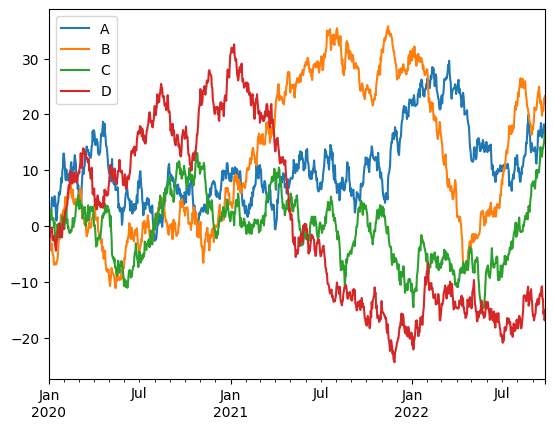

In [55]:
df_visual = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df_visual = df_visual.cumsum()
plt.figure(); df_visual.plot(); plt.legend(loc='best')

## Plotting & complementary packages 
We'll use pandas' built-in plotting capabilities to visualize our data.

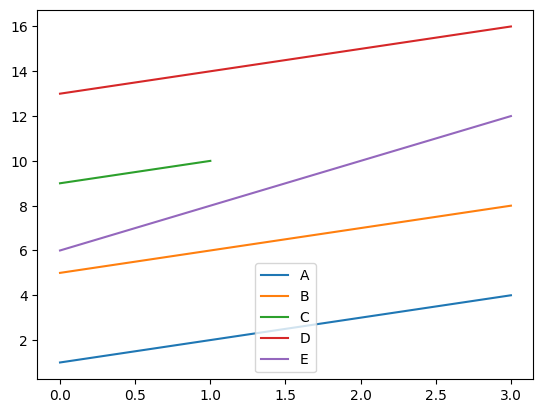

In [ ]:
import matplotlib.pyplot as plt
df2.plot()
plt.show()